<a href="https://colab.research.google.com/github/Harshi12b1/PRODIGY_ML_Tasks/blob/main/Prodigy_ML_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

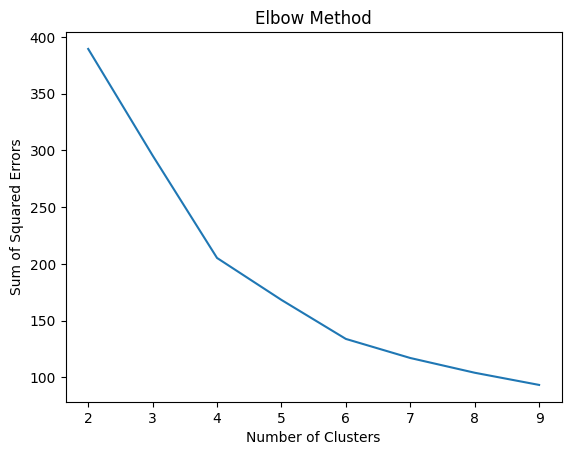

Cluster 0 has only one unique label. Skipping silhouette score calculation.
Cluster 1 has only one unique label. Skipping silhouette score calculation.
Cluster 2 has only one unique label. Skipping silhouette score calculation.
Cluster 3 has only one unique label. Skipping silhouette score calculation.
Cluster 4 has only one unique label. Skipping silhouette score calculation.
Average Silhouette Score: nan
Cluster Centers:
[[-0.42880597  0.97484722  1.21608539]
 [ 1.20484056 -0.23577338 -0.05236781]
 [-0.98067852 -0.74305983  0.46744035]
 [ 0.07333084  0.97494509 -1.19729675]
 [ 0.5310735  -1.2905084  -1.23646671]]
Sum of Squared Errors: 168.24758017556837
         CustomerID    Gender        Age  Annual Income (k$)  \
cluster                                                        
0        161.025000  0.550000  32.875000           86.100000   
1         83.872340  0.574468  55.638298           54.382979   
2         55.648148  0.592593  25.185185           41.092593   
3        159.74

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('/Mall_Customers.csv')

# Preprocess the data
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})  # Convert gender to numerical values

# Scale the data using StandardScaler
scaler = StandardScaler()
# Correct the column name from 'Annual Income' to 'Annual Income (k$)'
df_scaled = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Determine the optimal number of clusters (K) using the Elbow method
sse_values = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled)
    sse_values.append(kmeans.inertia_)
plt.plot(range(2, 10), sse_values)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors')
plt.title('Elbow Method')
plt.show()

# Select the optimal number of clusters (K=5 in this example)
k = 5

# Perform K-means clustering
kmeans = KMeans(n_clusters=k)
kmeans.fit(df_scaled)

# Assign each customer to a cluster
labels = kmeans.labels_

# Calculate the silhouette score for each customer
silhouette_values = []
for i in range(k):
    cluster = df_scaled[labels == i]
    # Check if the cluster has more than one unique label
    if len(np.unique(labels[labels == i])) > 1:
        silhouette_values.append(silhouette_score(cluster, labels[labels == i]))
    else:
        print(f"Cluster {i} has only one unique label. Skipping silhouette score calculation.")
print('Average Silhouette Score:', np.mean(silhouette_values))

# Evaluate the clustering
print('Cluster Centers:')
print(kmeans.cluster_centers_)
print('Sum of Squared Errors:', kmeans.inertia_)

# Add the cluster labels to the original dataset
df['cluster'] = labels

# Analyze the clusters
print(df.groupby('cluster').mean())
print(df.groupby('cluster').count())
